In [3]:
import yfinance as yf
import numpy as np
import pandas as pd
from pandas.tseries.offsets import MonthEnd
import math

In [4]:
stocks = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[2].Symbol

In [5]:
stocks.head(5)

0      ADANIENT
1    ADANIPORTS
2    APOLLOHOSP
3    ASIANPAINT
4      AXISBANK
Name: Symbol, dtype: object

In [6]:
stocks = stocks + '.NS'

In [7]:
stocks = stocks.to_list()

In [8]:
df = yf.download(stocks,start='2010-01-01',end='2019-06-30')['Close']

[*********************100%***********************]  50 of 50 completed


In [9]:
df

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,69.219017,111.349998,347.149994,178.865005,198.419998,866.025024,35.314632,33.334953,298.591614,108.458336,...,150.735001,94.925003,163.535919,60.379684,375.825012,255.750000,71.074997,966.099976,116.233330,156.105011
2010-01-05,70.820740,115.190002,366.375000,179.429993,202.559998,870.025024,35.393230,33.111488,303.320221,106.824997,...,155.264999,102.285004,160.686478,61.842136,375.924988,259.024994,72.532501,986.099976,121.933334,158.568756
2010-01-06,77.810081,120.900002,353.924988,178.889999,199.160004,856.575012,34.558136,33.587563,300.106598,105.216667,...,157.279999,103.885002,160.933823,61.170456,367.424988,260.299988,73.699997,987.299988,119.766663,155.362503
2010-01-07,74.598969,119.470001,356.924988,177.065002,200.570007,841.549988,34.287960,33.383530,302.447968,103.175003,...,154.884995,104.250000,155.432831,61.908825,357.200012,254.574997,75.532501,978.349976,118.633331,152.606262
2010-01-08,75.541611,119.330002,355.725006,179.990005,203.190002,827.625000,34.386208,33.990768,298.453888,104.925003,...,157.494995,104.769997,156.283707,61.780209,349.899994,261.274994,74.834999,990.299988,117.900002,150.311264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-24,147.750000,406.000000,1344.650024,1376.150024,762.849976,2816.899902,835.465027,3545.350098,345.100006,380.850006,...,383.450012,259.950012,159.300003,48.625000,2275.500000,728.250000,1300.050049,4574.799805,624.366638,283.899994
2019-06-25,150.850006,405.649994,1324.849976,1363.099976,781.650024,2843.699951,834.614990,3579.850098,348.600006,393.100006,...,385.750000,259.149994,160.449997,49.799999,2267.800049,724.349976,1318.150024,4596.049805,623.299988,285.299988
2019-06-26,153.800003,414.950012,1307.949951,1359.949951,788.599976,2868.699951,841.049988,3627.949951,345.549988,391.399994,...,399.450012,272.649994,161.100006,51.060001,2254.199951,718.099976,1309.050049,4597.399902,638.966675,286.149994


In [10]:
ret_df = df.pct_change()

In [11]:
ret_df

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.023140,0.034486,0.055380,0.003159,0.020865,0.004619,0.002226,-0.006704,0.015836,-0.015060,...,0.030053,0.077535,-0.017424,0.024221,0.000266,0.012805,0.020507,0.020702,0.049039,0.015783
2010-01-06,0.098691,0.049570,-0.033982,-0.003009,-0.016785,-0.015459,-0.023595,0.014378,-0.010595,-0.015056,...,0.012978,0.015643,0.001539,-0.010861,-0.022611,0.004922,0.016096,0.001217,-0.017769,-0.020220
2010-01-07,-0.041269,-0.011828,0.008476,-0.010202,0.007080,-0.017541,-0.007818,-0.006075,0.007802,-0.019404,...,-0.015228,0.003513,-0.034182,0.012071,-0.027829,-0.021994,0.024864,-0.009065,-0.009463,-0.017741
2010-01-08,0.012636,-0.001172,-0.003362,0.016519,0.013063,-0.016547,0.002865,0.018190,-0.013206,0.016961,...,0.016851,0.004988,0.005474,-0.002078,-0.020437,0.026318,-0.009234,0.012214,-0.006181,-0.015039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-24,0.006471,0.009950,-0.002670,-0.004953,-0.010635,-0.020396,-0.004504,-0.005749,0.003781,0.002237,...,0.001698,-0.007066,0.002517,-0.022908,0.011401,-0.016476,0.005958,-0.004429,0.052185,-0.006822
2019-06-25,0.020981,-0.000862,-0.014725,-0.009483,0.024644,0.009514,-0.001017,0.009731,0.010142,0.032165,...,0.005998,-0.003078,0.007219,0.024165,-0.003384,-0.005355,0.013923,0.004645,-0.001708,0.004931
2019-06-26,0.019556,0.022926,-0.012756,-0.002311,0.008891,0.008791,0.007710,0.013436,-0.008749,-0.004325,...,0.035515,0.052093,0.004051,0.025301,-0.005997,-0.008628,-0.006904,0.000294,0.025135,0.002979


In [12]:
mtl_ret = (ret_df + 1).resample('M').prod()

In [13]:
mtl_ret

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-31,0.981510,1.069062,0.982212,1.035530,1.033868,1.009035,0.886354,0.899155,0.942189,0.831118,...,0.977245,0.964077,0.840160,0.897988,0.979445,0.950635,1.055857,0.962633,0.891311,0.933915
2010-02-28,1.097800,1.132140,1.001540,0.977189,1.096324,1.040024,1.089454,0.973582,0.911717,1.042711,...,1.045246,1.024477,1.024267,1.009225,1.034773,0.916041,1.163469,1.118333,0.974260,1.045605
2010-03-31,0.965269,1.171774,1.068155,1.126468,1.038906,1.108464,0.968453,1.066589,1.118847,0.918610,...,1.163863,1.044051,1.065382,1.100461,1.024744,0.957625,1.054030,1.110379,0.985469,1.043469
2010-04-30,1.197679,0.935917,1.075183,1.019594,1.087096,1.038987,1.023204,1.338536,0.955207,0.998938,...,0.876786,1.075803,1.151643,0.979116,0.980465,0.907514,1.156824,0.842317,1.140751,0.949855
2010-05-31,0.964803,0.942422,0.946328,1.003512,0.970354,1.055414,1.282163,1.064366,0.880590,1.122995,...,1.059159,1.029296,0.865230,0.809081,0.970800,0.821751,1.043560,0.947571,1.070212,0.997245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-28,0.939482,0.962203,0.860634,0.994761,0.981804,1.135464,1.060827,1.028798,1.038022,0.977131,...,1.051246,0.950442,0.979305,1.049822,0.984782,1.134240,1.029524,1.087275,1.115830,0.999188
2019-03-31,1.069461,1.170170,1.036857,1.065329,1.100275,1.016617,1.075838,1.130936,1.037415,1.143090,...,1.068067,1.027104,0.961116,1.011690,1.008495,0.929591,1.106370,1.021547,1.058626,0.920755
2019-04-30,0.921988,1.030160,1.028361,0.977388,0.982259,1.011971,1.081682,1.033413,1.057260,0.984450,...,0.962562,1.051520,1.256523,1.100533,1.130006,1.083452,1.021424,1.181084,1.043162,1.171933


## Without one-month Lag while calculating momentum

In [14]:
mtl_3 = mtl_ret.rolling(3).apply(np.prod).dropna()
mtl_6 = mtl_ret.rolling(6).apply(np.prod).dropna()
mtl_9 = mtl_ret.rolling(9).apply(np.prod).dropna()
mtl_12 = mtl_ret.rolling(12).apply(np.prod).dropna()

In [15]:
mtl_3

,ADANIENT.NS,ADANIPORTS.NS,APOLLOHOSP.NS,ASIANPAINT.NS,AXISBANK.NS,BAJAJ-AUTO.NS,BAJAJFINSV.NS,BAJFINANCE.NS,BHARTIARTL.NS,BPCL.NS,...,SUNPHARMA.NS,TATACONSUM.NS,TATAMOTORS.NS,TATASTEEL.NS,TCS.NS,TECHM.NS,TITAN.NS,ULTRACEMCO.NS,UPL.NS,WIPRO.NS
Date,,,,,,,,,,,,,,,,,,,,,
2010-03-31,1.040080,1.418231,1.050771,1.139882,1.177553,1.163246,0.935179,0.933693,0.961101,0.796081,...,1.188841,1.031183,0.916813,0.997318,1.038582,0.833920,1.294829,1.195373,0.855750,1.018954
2010-04-30,1.269148,1.241599,1.150231,1.122341,1.238179,1.197774,1.079567,1.389951,0.974380,0.956827,...,1.066630,1.150686,1.256715,1.087419,1.039663,0.796093,1.418649,1.045968,1.095238,1.036345
2010-05-31,1.115393,1.033539,1.086823,1.152573,1.095909,1.215498,1.270527,1.519561,0.941113,1.030499,...,1.080827,1.156098,1.061586,0.871768,0.975387,0.714149,1.272441,0.886255,1.203104,0.988413
2010-06-30,1.147009,0.935284,1.029402,1.128970,1.063471,1.234664,1.300461,1.482129,0.840825,1.279317,...,0.996150,1.241763,1.027452,0.768373,0.962019,0.860626,1.287759,0.761398,1.233579,0.906476
2010-07-31,1.037863,0.979905,0.999554,1.252333,1.057835,1.284066,1.250909,1.326959,1.027633,1.239710,...,1.125636,1.102037,0.969917,0.867739,1.097204,0.904417,1.317741,0.888101,1.082256,1.023331
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-28,0.780909,0.891153,0.902040,1.044021,1.133919,1.056416,1.078090,1.043859,1.014514,1.040536,...,0.903674,0.885891,1.031986,0.945137,1.007723,1.175933,1.105814,0.956709,1.158089,1.136301
2019-03-31,0.855901,0.983492,0.940118,1.090273,1.259397,1.084058,1.073430,1.132582,1.055840,1.063680,...,1.104414,0.906791,0.987551,0.971692,1.056655,1.067137,1.218314,0.979454,1.225255,1.026648
2019-04-30,0.926358,1.159900,0.917663,1.035785,1.061090,1.168151,1.234500,1.202381,1.138521,1.099580,...,1.080765,1.026497,1.182671,1.168869,1.122263,1.142369,1.163436,1.311833,1.232231,1.078187


In [27]:
#we vary the argument of the nlargest function from 5 to 25 in steps of 5 to obtain our data

def top_performers_12(date, K):
    all_ = mtl_12.loc[date]
    top = all_.nlargest(25)
    relevant_ret_12 = mtl_ret[top.name:][K:K+1][top.index]
    if relevant_ret_12.empty != 1:
        return (relevant_ret_12).mean(axis=1).values[0]

def top_performers_9(date, K):
    all_ = mtl_9.loc[date]
    top = all_.nlargest(25)
    relevant_ret_9 = mtl_ret[top.name:][K:K+1][top.index]
    if relevant_ret_9.empty != 1:
        return (relevant_ret_9).mean(axis=1).values[0]

def top_performers_6(date, K):
    all_ = mtl_6.loc[date]
    top = all_.nlargest(25)
    relevant_ret_6 = mtl_ret[top.name:][K:K+1][top.index]
    if relevant_ret_6.empty != 1:
        return (relevant_ret_6).mean(axis=1).values[0]

def top_performers_3(date,K):
    all_ = mtl_3.loc[date]
    top = all_.nlargest(25)
    relevant_ret_3 = mtl_ret[top.name:][K:K+1][top.index]
    if relevant_ret_3.empty != 1:
        return (relevant_ret_3).mean(axis=1).values[0]

In [19]:
data5 = []
for j in range(1,5):
    row = []
    if j == 1:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_3.index[:-1]:
                mom_ret.append(top_performers_3(date,3*k))
                
            row.append(round(pd.Series(mom_ret).prod(),2))
            
    elif j == 2:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_6.index[:-1]:
                mom_ret.append(top_performers_6(date,3*k))
            #print(round(pd.Series(mom_ret).prod(),2), end="\t")
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 3:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_9.index[:-1]:
                mom_ret.append(top_performers_9(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 4:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_12.index[:-1]:
                mom_ret.append(top_performers_12(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
    
    data5.append(row)

print(data5)

[[4.78, 6.55, 5.74, 7.83], [7.11, 7.47, 10.42, 5.8], [5.79, 11.79, 5.74, 5.77], [12.5, 8.09, 10.72, 9.32]]


In [24]:

data10 = []
for j in range(1,5):
    row = []

    if j == 1:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_3.index[:-1]:
                mom_ret.append(top_performers_3(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
            
    elif j == 2:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_6.index[:-1]:
                mom_ret.append(top_performers_6(date,3*k))
  
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 3:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_9.index[:-1]:
                mom_ret.append(top_performers_9(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 4:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_12.index[:-1]:
                mom_ret.append(top_performers_12(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
    
    data10.append(row)

print(data10)

[[5.03, 6.65, 5.69, 5.47], [5.66, 6.43, 7.17, 4.12], [6.11, 9.33, 4.86, 5.09], [8.38, 5.92, 6.54, 4.17]]


In [22]:

data15 = []
for j in range(1,5):
    row = []
    
    if j == 1:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_3.index[:-1]:
                mom_ret.append(top_performers_3(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
            
    elif j == 2:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_6.index[:-1]:
                mom_ret.append(top_performers_6(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 3:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_9.index[:-1]:
                mom_ret.append(top_performers_9(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 4:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_12.index[:-1]:
                mom_ret.append(top_performers_12(date,3*k))
  
            row.append(round(pd.Series(mom_ret).prod(),2))
    
    data15.append(row)

print(data15)

[[4.82, 5.86, 4.92, 4.94], [5.35, 5.75, 6.18, 3.79], [6.22, 7.73, 4.83, 4.52], [6.91, 5.44, 5.61, 4.4]]


In [26]:

data20 = []
for j in range(1,5):
    row = []

    if j == 1:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_3.index[:-1]:
                mom_ret.append(top_performers_3(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
            
    elif j == 2:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_6.index[:-1]:
                mom_ret.append(top_performers_6(date,3*k))
     
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 3:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_9.index[:-1]:
                mom_ret.append(top_performers_9(date,3*k))
         
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 4:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_12.index[:-1]:
                mom_ret.append(top_performers_12(date,3*k))
     
            row.append(round(pd.Series(mom_ret).prod(),2))
    
    data20.append(row)

print(data20)

[[4.18, 5.24, 4.68, 4.71], [4.82, 5.53, 5.75, 3.77], [5.53, 6.54, 4.21, 4.47], [6.6, 4.73, 4.53, 4.05]]


In [28]:
data25 = []
for j in range(1,5):
    row = []

    if j == 1:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_3.index[:-1]:
                mom_ret.append(top_performers_3(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
            
    elif j == 2:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_6.index[:-1]:
                mom_ret.append(top_performers_6(date,3*k))
      
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 3:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_9.index[:-1]:
                mom_ret.append(top_performers_9(date,3*k))
     
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 4:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_12.index[:-1]:
                mom_ret.append(top_performers_12(date,3*k))
 
            row.append(round(pd.Series(mom_ret).prod(),2))
    
    data25.append(row)

print(data25)

[[3.91, 4.43, 4.31, 4.69], [4.27, 4.83, 4.93, 3.62], [4.59, 4.99, 4.05, 3.99], [5.36, 4.29, 4.2, 4.37]]


In [34]:
#storing all the results in a single list for ease of visualization

data = []
data.append(data5)
data.append(data10)
data.append(data15)
data.append(data20)
data.append(data25)

data

[[[4.78, 6.55, 5.74, 7.83],
  [7.11, 7.47, 10.42, 5.8],
  [5.79, 11.79, 5.74, 5.77],
  [12.5, 8.09, 10.72, 9.32]],
 [[5.03, 6.65, 5.69, 5.47],
  [5.66, 6.43, 7.17, 4.12],
  [6.11, 9.33, 4.86, 5.09],
  [8.38, 5.92, 6.54, 4.17]],
 [[4.82, 5.86, 4.92, 4.94],
  [5.35, 5.75, 6.18, 3.79],
  [6.22, 7.73, 4.83, 4.52],
  [6.91, 5.44, 5.61, 4.4]],
 [[4.18, 5.24, 4.68, 4.71],
  [4.82, 5.53, 5.75, 3.77],
  [5.53, 6.54, 4.21, 4.47],
  [6.6, 4.73, 4.53, 4.05]],
 [[3.91, 4.43, 4.31, 4.69],
  [4.27, 4.83, 4.93, 3.62],
  [4.59, 4.99, 4.05, 3.99],
  [5.36, 4.29, 4.2, 4.37]]]

In [35]:
#Convert multi-dimensional list into dataframe

data = [[[4.78, 6.55, 5.74, 7.83],
  [7.11, 7.47, 10.42, 5.8],
  [5.79, 11.79, 5.74, 5.77],
  [12.5, 8.09, 10.72, 9.32]],
 [[5.03, 6.65, 5.69, 5.47],
  [5.66, 6.43, 7.17, 4.12],
  [6.11, 9.33, 4.86, 5.09],
  [8.38, 5.92, 6.54, 4.17]],
 [[4.82, 5.86, 4.92, 4.94],
  [5.35, 5.75, 6.18, 3.79],
  [6.22, 7.73, 4.83, 4.52],
  [6.91, 5.44, 5.61, 4.4]],
 [[4.18, 5.24, 4.68, 4.71],
  [4.82, 5.53, 5.75, 3.77],
  [5.53, 6.54, 4.21, 4.47],
  [6.6, 4.73, 4.53, 4.05]],
 [[3.91, 4.43, 4.31, 4.69],
  [4.27, 4.83, 4.93, 3.62],
  [4.59, 4.99, 4.05, 3.99],
  [5.36, 4.29, 4.2, 4.37]]]

dicts = []

for i in range(5):
    
    d = {
        'K = 3':data[i][0],
        'K = 6':data[i][1],
        'K = 9':data[i][2],
        'K = 12':data[i][3]
    }
    df = pd.DataFrame(d,index = ['J = 3','J = 6','J = 9','J = 12'])
    
    dicts.append(df)


In [37]:
for i in range(5):
    print(dicts[i])
    print('\n\n')

        K = 3  K = 6  K = 9  K = 12
J = 3    4.78   7.11   5.79   12.50
J = 6    6.55   7.47  11.79    8.09
J = 9    5.74  10.42   5.74   10.72
J = 12   7.83   5.80   5.77    9.32



        K = 3  K = 6  K = 9  K = 12
J = 3    5.03   5.66   6.11    8.38
J = 6    6.65   6.43   9.33    5.92
J = 9    5.69   7.17   4.86    6.54
J = 12   5.47   4.12   5.09    4.17



        K = 3  K = 6  K = 9  K = 12
J = 3    4.82   5.35   6.22    6.91
J = 6    5.86   5.75   7.73    5.44
J = 9    4.92   6.18   4.83    5.61
J = 12   4.94   3.79   4.52    4.40



        K = 3  K = 6  K = 9  K = 12
J = 3    4.18   4.82   5.53    6.60
J = 6    5.24   5.53   6.54    4.73
J = 9    4.68   5.75   4.21    4.53
J = 12   4.71   3.77   4.47    4.05



        K = 3  K = 6  K = 9  K = 12
J = 3    3.91   4.27   4.59    5.36
J = 6    4.43   4.83   4.99    4.29
J = 9    4.31   4.93   4.05    4.20
J = 12   4.69   3.62   3.99    4.37





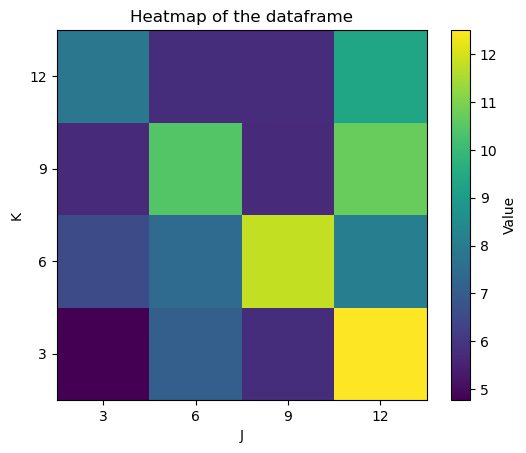

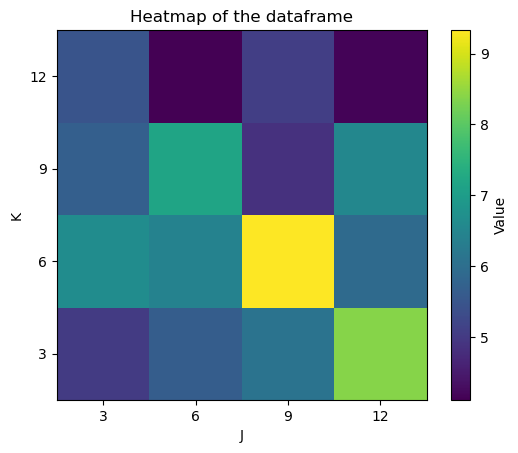

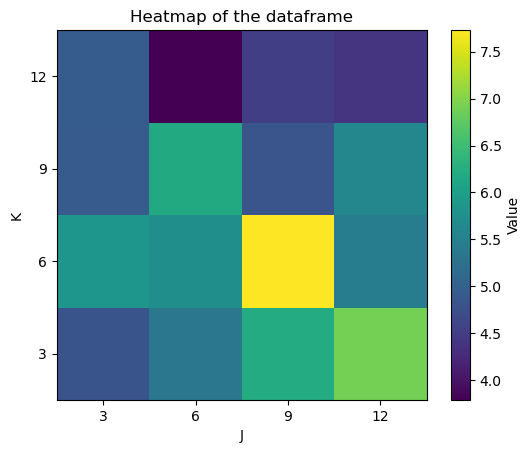

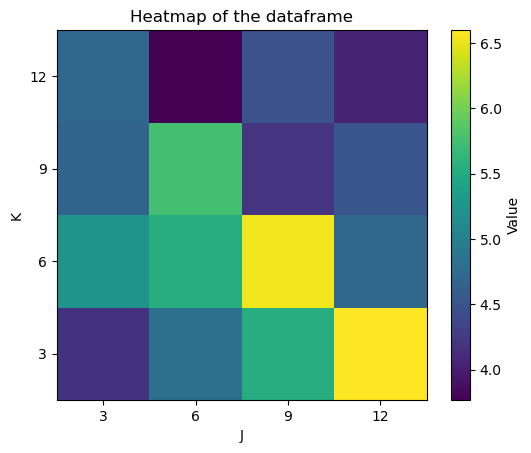

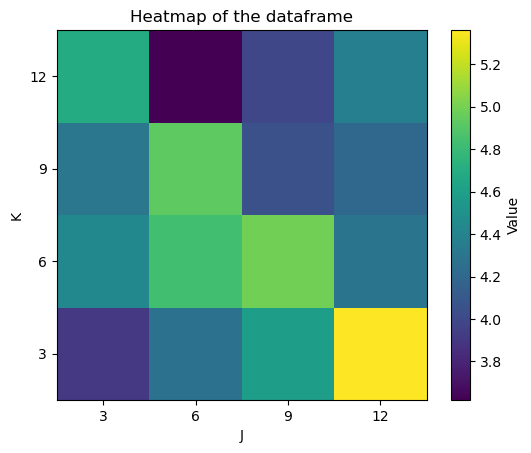

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with the latest updated data

for i in range(5):
    temp = []
    for x in data[i][0]:
        temp.append(x)
    for x in data[i][1]:
        temp.append(x)
    for x in data[i][2]:
        temp.append(x)
    for x in data[i][3]:
        temp.append(x)
    
    dictforn = {'K': [3, 6, 9,12, 3, 6,9,12, 3, 6, 9,12, 3, 6,9, 12],
            'J': [3, 3, 3,3, 6, 6, 6,6, 9, 9, 9,9, 12, 12, 12,12],
            'Value': temp}

    df = pd.DataFrame(dictforn)

    # Pivot the dataframe to have 'K' as index, 'J' as columns, and 'Value' as values
    pivot_df = df.pivot(index='K', columns='J', values='Value')

    # Plot the dataframe as a heatmap
    plt.imshow(pivot_df.values, cmap='viridis', origin='lower')
    plt.colorbar(label='Value')
    plt.xlabel('J')
    plt.ylabel('K')
    plt.xticks(range(len(pivot_df.columns)), pivot_df.columns)
    plt.yticks(range(len(pivot_df.index)), pivot_df.index)
    plt.title('Heatmap of the dataframe')
    plt.show()


## Including a one-month lag while calculating momentum to avoid Reversal Effect

In [39]:
mtl_2 = mtl_ret.rolling(2).apply(np.prod).dropna()
mtl_5 = mtl_ret.rolling(5).apply(np.prod).dropna()
mtl_8 = mtl_ret.rolling(8).apply(np.prod).dropna()
mtl_11 = mtl_ret.rolling(11).apply(np.prod).dropna()

In [50]:
def top_performers_11(date, K):
    all_ = mtl_11.loc[date-MonthEnd(1)]
    top = all_.nlargest(25)
    relevant_ret_11 = mtl_ret[top.name:][K+1:K+2][top.index]
    if relevant_ret_11.empty != 1:
        return (relevant_ret_11).mean(axis=1).values[0]

def top_performers_8(date, K):
    all_ = mtl_8.loc[date-MonthEnd(1)]
    top = all_.nlargest(25)
    relevant_ret_8 = mtl_ret[top.name:][K+1:K+2][top.index]
    if relevant_ret_8.empty != 1:
        return (relevant_ret_8).mean(axis=1).values[0]

def top_performers_5(date, K):
    all_ = mtl_5.loc[date-MonthEnd(1)]
    top = all_.nlargest(25)
    relevant_ret_5 = mtl_ret[top.name:][K+1:K+2][top.index]
    if relevant_ret_5.empty != 1:
        return (relevant_ret_5).mean(axis=1).values[0]

def top_performers_2(date,K):
    all_ = mtl_2.loc[date-MonthEnd(1)]
    top = all_.nlargest(25)
    relevant_ret_2 = mtl_ret[top.name:][K+1:K+2][top.index]
    if relevant_ret_2.empty != 1:
        return (relevant_ret_2).mean(axis=1).values[0]

In [43]:

data5 = []
for j in range(1,5):
    row = []
  
    if j == 1:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_3.index[:-1]:
                mom_ret.append(top_performers_2(date,3*k))
        
            row.append(round(pd.Series(mom_ret).prod(),2))
            
    elif j == 2:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_6.index[:-1]:
                mom_ret.append(top_performers_5(date,3*k))
     
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 3:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_9.index[:-1]:
                mom_ret.append(top_performers_8(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 4:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_12.index[:-1]:
                mom_ret.append(top_performers_11(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
    
    data5.append(row)

print(data5)

[[6.7, 4.82, 12.27, 6.28], [9.04, 6.15, 12.52, 4.33], [6.65, 10.16, 7.41, 5.64], [10.31, 8.62, 12.32, 8.92]]


In [45]:
data10 = []
for j in range(1,5):
    row = []

    if j == 1:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_3.index[:-1]:
                mom_ret.append(top_performers_2(date,3*k))
          
            row.append(round(pd.Series(mom_ret).prod(),2))
            
    elif j == 2:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_6.index[:-1]:
                mom_ret.append(top_performers_5(date,3*k))
         
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 3:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_9.index[:-1]:
                mom_ret.append(top_performers_8(date,3*k))
           
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 4:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_12.index[:-1]:
                mom_ret.append(top_performers_11(date,3*k))
      
            row.append(round(pd.Series(mom_ret).prod(),2))
    
    data10.append(row)

print(data10)

[[6.39, 5.44, 7.52, 5.71], [6.05, 5.96, 9.13, 3.87], [7.56, 8.11, 4.86, 4.68], [8.64, 5.53, 7.56, 4.58]]


In [47]:
data15 = []
for j in range(1,5):
    row = []
 
    if j == 1:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_3.index[:-1]:
                mom_ret.append(top_performers_2(date,3*k))
         
            row.append(round(pd.Series(mom_ret).prod(),2))
            
    elif j == 2:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_6.index[:-1]:
                mom_ret.append(top_performers_5(date,3*k))
    
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 3:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_9.index[:-1]:
                mom_ret.append(top_performers_8(date,3*k))
  
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 4:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_12.index[:-1]:
                mom_ret.append(top_performers_11(date,3*k))
         
            row.append(round(pd.Series(mom_ret).prod(),2))
    
    data15.append(row)

print(data15)

[[5.34, 4.65, 5.3, 4.69], [5.54, 5.28, 8.02, 3.46], [6.01, 6.36, 5.39, 4.43], [6.55, 4.78, 5.64, 4.56]]


In [49]:
data20 = []
for j in range(1,5):
    row = []

    if j == 1:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_3.index[:-1]:
                mom_ret.append(top_performers_2(date,3*k))
           
            row.append(round(pd.Series(mom_ret).prod(),2))
            
    elif j == 2:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_6.index[:-1]:
                mom_ret.append(top_performers_5(date,3*k))
        
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 3:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_9.index[:-1]:
                mom_ret.append(top_performers_8(date,3*k))
        
            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 4:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_12.index[:-1]:
                mom_ret.append(top_performers_11(date,3*k))
    
            row.append(round(pd.Series(mom_ret).prod(),2))
    
    data20.append(row)

print(data20)

[[4.32, 4.29, 5.36, 4.25], [4.68, 4.42, 6.0, 3.68], [5.15, 5.4, 4.61, 3.79], [6.07, 4.79, 4.79, 4.29]]


In [51]:
data25 = []
for j in range(1,5):
    row = []

    if j == 1:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_3.index[:-1]:
                mom_ret.append(top_performers_2(date,3*k))
          
            row.append(round(pd.Series(mom_ret).prod(),2))
            
    elif j == 2:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_6.index[:-1]:
                mom_ret.append(top_performers_5(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 3:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_9.index[:-1]:
                mom_ret.append(top_performers_8(date,3*k))

            row.append(round(pd.Series(mom_ret).prod(),2))
    elif j == 4:
        for k in range(1,5):
            mom_ret = []
            for date in mtl_12.index[:-1]:
                mom_ret.append(top_performers_11(date,3*k))
      
            row.append(round(pd.Series(mom_ret).prod(),2))
    
    data25.append(row)

print(data25)

[[4.16, 4.18, 4.77, 4.17], [4.49, 4.24, 5.08, 3.53], [4.54, 5.24, 3.96, 4.16], [5.48, 4.04, 4.48, 4.37]]


In [52]:
data = []
data.append(data5)
data.append(data10)
data.append(data15)
data.append(data20)
data.append(data25)

data

[[[6.7, 4.82, 12.27, 6.28],
  [9.04, 6.15, 12.52, 4.33],
  [6.65, 10.16, 7.41, 5.64],
  [10.31, 8.62, 12.32, 8.92]],
 [[6.39, 5.44, 7.52, 5.71],
  [6.05, 5.96, 9.13, 3.87],
  [7.56, 8.11, 4.86, 4.68],
  [8.64, 5.53, 7.56, 4.58]],
 [[5.34, 4.65, 5.3, 4.69],
  [5.54, 5.28, 8.02, 3.46],
  [6.01, 6.36, 5.39, 4.43],
  [6.55, 4.78, 5.64, 4.56]],
 [[4.32, 4.29, 5.36, 4.25],
  [4.68, 4.42, 6.0, 3.68],
  [5.15, 5.4, 4.61, 3.79],
  [6.07, 4.79, 4.79, 4.29]],
 [[4.16, 4.18, 4.77, 4.17],
  [4.49, 4.24, 5.08, 3.53],
  [4.54, 5.24, 3.96, 4.16],
  [5.48, 4.04, 4.48, 4.37]]]

In [55]:
#Convert multi-dimensional list into dataframe

data = [[[6.7, 4.82, 12.27, 6.28],
  [9.04, 6.15, 12.52, 4.33],
  [6.65, 10.16, 7.41, 5.64],
  [10.31, 8.62, 12.32, 8.92]],
 [[6.39, 5.44, 7.52, 5.71],
  [6.05, 5.96, 9.13, 3.87],
  [7.56, 8.11, 4.86, 4.68],
  [8.64, 5.53, 7.56, 4.58]],
 [[5.34, 4.65, 5.3, 4.69],
  [5.54, 5.28, 8.02, 3.46],
  [6.01, 6.36, 5.39, 4.43],
  [6.55, 4.78, 5.64, 4.56]],
 [[4.32, 4.29, 5.36, 4.25],
  [4.68, 4.42, 6.0, 3.68],
  [5.15, 5.4, 4.61, 3.79],
  [6.07, 4.79, 4.79, 4.29]],
 [[4.16, 4.18, 4.77, 4.17],
  [4.49, 4.24, 5.08, 3.53],
  [4.54, 5.24, 3.96, 4.16],
  [5.48, 4.04, 4.48, 4.37]]]

dicts = []

for i in range(5):
    
    d = {
        'J = 3':data[i][0],
        'J = 6':data[i][1],
        'J = 9':data[i][2],
        'J = 12':data[i][3]
    }
    df = pd.DataFrame(d,index = ['K = 3','K = 6','K = 9','K = 12'])
    
    dicts.append(df)

In [56]:
for i in range(5):
    print(dicts[i])
    print('\n\n')

        J = 3  J = 6  J = 9  J = 12
K = 3    6.70   9.04   6.65   10.31
K = 6    4.82   6.15  10.16    8.62
K = 9   12.27  12.52   7.41   12.32
K = 12   6.28   4.33   5.64    8.92



        J = 3  J = 6  J = 9  J = 12
K = 3    6.39   6.05   7.56    8.64
K = 6    5.44   5.96   8.11    5.53
K = 9    7.52   9.13   4.86    7.56
K = 12   5.71   3.87   4.68    4.58



        J = 3  J = 6  J = 9  J = 12
K = 3    5.34   5.54   6.01    6.55
K = 6    4.65   5.28   6.36    4.78
K = 9    5.30   8.02   5.39    5.64
K = 12   4.69   3.46   4.43    4.56



        J = 3  J = 6  J = 9  J = 12
K = 3    4.32   4.68   5.15    6.07
K = 6    4.29   4.42   5.40    4.79
K = 9    5.36   6.00   4.61    4.79
K = 12   4.25   3.68   3.79    4.29



        J = 3  J = 6  J = 9  J = 12
K = 3    4.16   4.49   4.54    5.48
K = 6    4.18   4.24   5.24    4.04
K = 9    4.77   5.08   3.96    4.48
K = 12   4.17   3.53   4.16    4.37





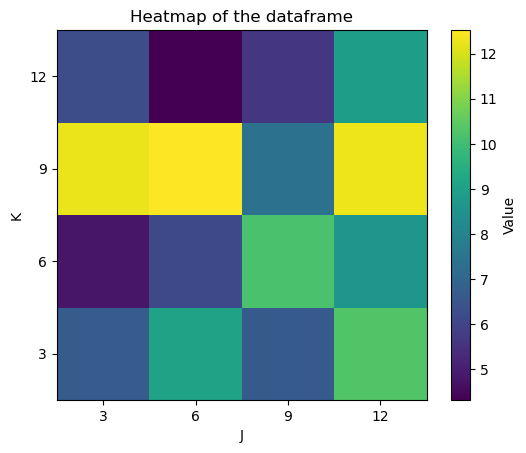

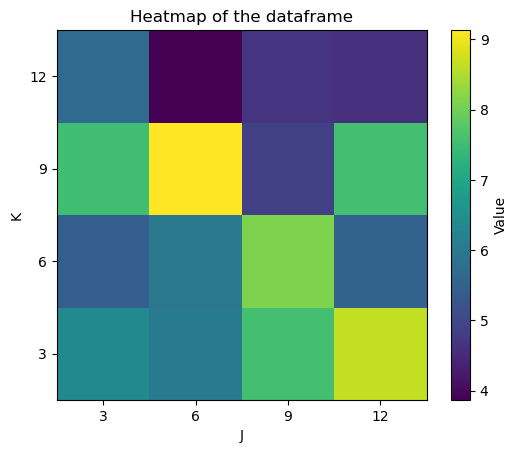

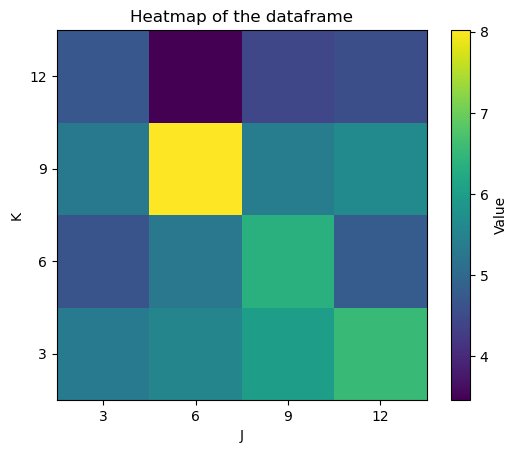

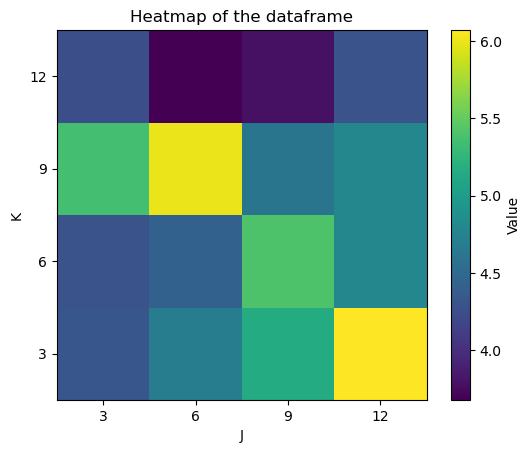

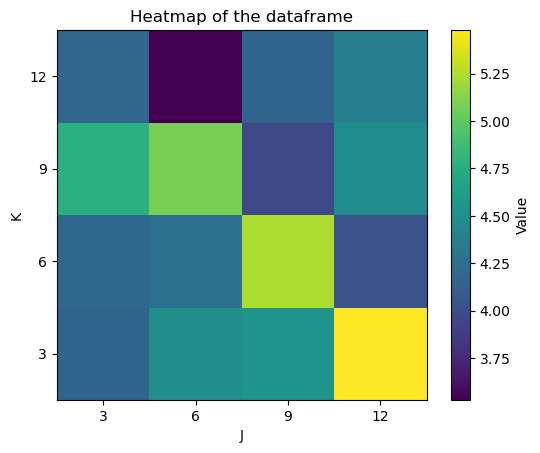

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a dataframe with the latest updated data

for i in range(5):
    temp = []
    for x in data[i][0]:
        temp.append(x)
    for x in data[i][1]:
        temp.append(x)
    for x in data[i][2]:
        temp.append(x)
    for x in data[i][3]:
        temp.append(x)
    
    dictforn = {'K': [3, 6, 9,12, 3, 6,9,12, 3, 6, 9,12, 3, 6,9, 12],
            'J': [3, 3, 3,3, 6, 6, 6,6, 9, 9, 9,9, 12, 12, 12,12],
            'Value': temp}

    df = pd.DataFrame(dictforn)

    # Pivot the dataframe to have 'K' as columns, 'J' as index, and 'Value' as values
    pivot_df = df.pivot(index='K', columns='J', values='Value')

    # Plot the dataframe as a heatmap
    plt.imshow(pivot_df.values, cmap='viridis', origin='lower')
    plt.colorbar(label='Value')
    plt.xlabel('J')
    plt.ylabel('K')
    plt.xticks(range(len(pivot_df.columns)), pivot_df.columns)
    plt.yticks(range(len(pivot_df.index)), pivot_df.index)
    plt.title('Heatmap of the dataframe')
    plt.show()